# Pandas Course

All content sources used for learning and developing this file are available at the following links:



[Zurubabel Panda Course](https://www.youtube.com/watch?v=1ua6uksg6wg&list=PL4OAe-tL47sa1McMctk5pdPd5eTAp3drk)

[Parquet Tutorial with Python](https://www.youtube.com/watch?v=BztuEQ9ojtc&t=1612s)


Files:
[replication_max_rows.csv](https://docs.google.com/spreadsheets/d/1Mrr12MXrEY1o_3zpu-2ZFVg0lKhRVVYgr3oS0frJGjI/edit?usp=drive_link)


Dependecy install

In [1]:
!pip install pandas
!pip install pathlib
!pip install pyarrow

In [2]:
import pandas as pd
import logging
from pathlib import Path

#Lesson 01 - Opening CSV files


Read csv(Comma-Separated Values) file


In [ ]:
df = pd.read_csv('./sample_data/replication.csv')
df.shape

(3967, 51)

Set head of dataframe from paramter

In [ ]:
df = pd.read_csv('./sample_data/replication.csv', header=0)
columns: list = df.columns.tolist()
print(f'columns: {columns[0:3]}...') if columns else print('columns: []')

columns: ['country_name', 'country_text_id', 'country_id']...


Remove head of dataframe from paramter

In [ ]:
df = pd.read_csv('./sample_data/replication.csv', header=None)
columns: list = df.columns.tolist()
print(f'columns: {columns[0:3]}...') if columns else print(f'columns: []')

columns: [0, 1, 2]...


Set separator of dataframe from paramter

In [ ]:
df = pd.read_csv('./sample_data/replication.csv', sep=',')
df.head(3)

,country_name,country_text_id,country_id,year,v2x_polyarchy,v2x_regime,e_boix_regime,e_polity2,e_regionpol,e_regionpol_6C,...,lgb_unions,lgb_jointadoption,lgb_secondparentadoption,lgb_score,lgb_percent,no_dircrim,no_indcrim,nophys,nopsych,nodiv
0,Mexico,MEX,3.0,1999.0,0.605,Electoral Democracy,0.0,6.0,Latin America,L. American and the Caribbean,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mexico,MEX,3.0,2000.0,0.667,Electoral Democracy,1.0,8.0,Latin America,L. American and the Caribbean,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0
2,Mexico,MEX,3.0,2001.0,0.684,Electoral Democracy,1.0,8.0,Latin America,L. American and the Caribbean,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0


Read specific columns

In [ ]:
df = pd.read_csv(
    './sample_data/replication.csv',
    sep=',',
    usecols=['country_name', 'country_text_id', 'country_id']
)
df.head(3)

,country_name,country_text_id,country_id
0,Mexico,MEX,3.0
1,Mexico,MEX,3.0
2,Mexico,MEX,3.0


Limit number of lines that will be read

In [ ]:
df = pd.read_csv(
    './sample_data/replication.csv',
    sep=',',
    usecols=['country_name', 'country_text_id', 'country_id'],
    nrows=3
)
df.shape

(3, 3)

#Lesson 02 - Opening Excel files

Read Excel file


In [ ]:
df = pd.read_excel('./sample_data/fat_wssm26.xlsx')
df.shape
df.head(3)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,Apuração,08/23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,Preparado por,Smarthis Bot,NaN,NaN,NaN,Layout SAP,/FISCAL_IND,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,Analista,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Set page to be read

In [ ]:
df = pd.read_excel('./sample_data/fat_wssm26.xlsx' , sheet_name=0)
df = pd.read_excel('./sample_data/fat_wssm26.xlsx' , sheet_name=1)
df.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,Apuração,Mês competência/Ano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,Preparado por,NaN,NaN,NaN,NaN,Layout SAP,/FISCAL_IND,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,Analista,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,Gestor -150k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Gestor +150k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Identify names of all tabs in the file

In [ ]:
excel_file = pd.ExcelFile('./sample_data/fat_wssm26.xlsx')
excel_file.sheet_names

['Modelo apuracao ISS Faturamento',
 'Modelo apuracao ISS Retido',
 'Modelo apuracao ISS Retido Imp',
 'Parâmetros execução RPA',
 'Modelo Relatório Prefeitura']

Using Parse to select the tab

In [ ]:
billing_page = excel_file.parse('Modelo apuracao ISS Faturamento')
print(billing_page.head(3))

print(f'\n {50*"-"} \n')

retained_page = excel_file.parse('Modelo apuracao ISS Retido')
print(retained_page.head(3))

   Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3     Unnamed: 4    Unnamed: 5  \
0         NaN        NaN        NaN        NaN       Apuração         08/23   
1         NaN        NaN        NaN        NaN  Preparado por  Smarthis Bot   
2         NaN        NaN        NaN        NaN       Analista           NaN   

  Unnamed: 6 Unnamed: 7 Unnamed: 8  Unnamed: 9  Unnamed: 10 Unnamed: 11  \
0        NaN        NaN        NaN         NaN          NaN         NaN   
1        NaN        NaN        NaN  Layout SAP  /FISCAL_IND         NaN   
2        NaN        NaN        NaN         NaN          NaN         NaN   

  Unnamed: 12 Unnamed: 13  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  

 -------------------------------------------------- 

   Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3     Unnamed: 4  \
0         NaN        NaN        NaN        NaN       Apuração   
1         NaN        NaN        NaN        NaN  Preparado por   
2         NaN       

#Lesson 03 - Opening SQL Server

Return connecat

In [ ]:
df = pd.read_excel('./sample_data/fat_wssm26.xlsx')
df.shape
df.head(3)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,Apuração,08/23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,Preparado por,Smarthis Bot,NaN,NaN,NaN,Layout SAP,/FISCAL_IND,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,Analista,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Set page to be read

In [ ]:
df = pd.read_excel('./sample_data/fat_wssm26.xlsx' , sheet_name=0)
df = pd.read_excel('./sample_data/fat_wssm26.xlsx' , sheet_name=1)
df.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,Apuração,Mês competência/Ano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,Preparado por,NaN,NaN,NaN,NaN,Layout SAP,/FISCAL_IND,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,Analista,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,Gestor -150k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Gestor +150k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Identify names of all tabs in the file

In [ ]:
excel_file = pd.ExcelFile('./sample_data/fat_wssm26.xlsx')
excel_file.sheet_names

['Modelo apuracao ISS Faturamento',
 'Modelo apuracao ISS Retido',
 'Modelo apuracao ISS Retido Imp',
 'Parâmetros execução RPA',
 'Modelo Relatório Prefeitura']

Using Parse to select the tab

In [ ]:
billing_page = excel_file.parse('Modelo apuracao ISS Faturamento')
print(billing_page.head(3))

print(f'\n {50*"-"} \n')

retained_page = excel_file.parse('Modelo apuracao ISS Retido')
print(retained_page.head(3))

   Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3     Unnamed: 4    Unnamed: 5  \
0         NaN        NaN        NaN        NaN       Apuração         08/23   
1         NaN        NaN        NaN        NaN  Preparado por  Smarthis Bot   
2         NaN        NaN        NaN        NaN       Analista           NaN   

  Unnamed: 6 Unnamed: 7 Unnamed: 8  Unnamed: 9  Unnamed: 10 Unnamed: 11  \
0        NaN        NaN        NaN         NaN          NaN         NaN   
1        NaN        NaN        NaN  Layout SAP  /FISCAL_IND         NaN   
2        NaN        NaN        NaN         NaN          NaN         NaN   

  Unnamed: 12 Unnamed: 13  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  

 -------------------------------------------------- 

   Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3     Unnamed: 4  \
0         NaN        NaN        NaN        NaN       Apuração   
1         NaN        NaN        NaN        NaN  Preparado por   
2         NaN       

#Lesson 04 - Selected datas

Selected for colum name

In [ ]:
df = pd.read_csv('./sample_data/replication.csv')
columns_name: list = df.columns.tolist()
print(f'columns datas: {columns_name[0]}')
print(df[columns_name[0]].head(3))


print(f'\ncolumns datas: {columns_name[0]}, {columns_name[8]}')
df[[columns_name[0], columns_name[8]]].head(3)

columns datas: country_name
0    Mexico
1    Mexico
2    Mexico
Name: country_name, dtype: object

columns datas: country_name, e_regionpol


,country_name,e_regionpol
0,Mexico,Latin America
1,Mexico,Latin America
2,Mexico,Latin America


Selected datas using "loc" and "iloc"

In [ ]:
df = pd.read_csv('./sample_data/replication.csv')
columns_name: list = df.columns.tolist()
print(f'columns datas: {columns_name[0]}')
print(df.loc[0:3, columns_name[0]])

print(f'\ncolumns datas: {columns_name[0]}, {columns_name[8]}')
print(df.loc[0:3, [columns_name[0], columns_name[8]]])

print(f'\ncolumns datas: {columns_name[0]}, {columns_name[8]}')
print(df.loc[0:3, columns_name[0]:columns_name[4]])


columns datas: country_name
0    Mexico
1    Mexico
2    Mexico
3    Mexico
Name: country_name, dtype: object

columns datas: country_name, e_regionpol
  country_name    e_regionpol
0       Mexico  Latin America
1       Mexico  Latin America
2       Mexico  Latin America
3       Mexico  Latin America

columns datas: country_name, e_regionpol
  country_name country_text_id  country_id    year  v2x_polyarchy
0       Mexico             MEX         3.0  1999.0          0.605
1       Mexico             MEX         3.0  2000.0          0.667
2       Mexico             MEX         3.0  2001.0          0.684
3       Mexico             MEX         3.0  2002.0          0.694


In [ ]:
df = pd.read_csv('./sample_data/replication.csv')
columns_name: list = df.columns.tolist()
print(f'columns datas: {columns_name[0]}')
print(df.iloc[0:3, 0])

print(f'\ncolumns datas: {columns_name[0]}, {columns_name[8]}')
print(df.iloc[0:3, [0,8]])

print(f'\ncolumns datas: {columns_name[0]}, {columns_name[8]}')
print(df.iloc[0:3, 0:4])

columns datas: country_name
0    Mexico
1    Mexico
2    Mexico
Name: country_name, dtype: object

columns datas: country_name, e_regionpol
  country_name    e_regionpol
0       Mexico  Latin America
1       Mexico  Latin America
2       Mexico  Latin America

columns datas: country_name, e_regionpol
  country_name country_text_id  country_id    year
0       Mexico             MEX         3.0  1999.0
1       Mexico             MEX         3.0  2000.0
2       Mexico             MEX         3.0  2001.0


#Lesson 05 - Parquet Files  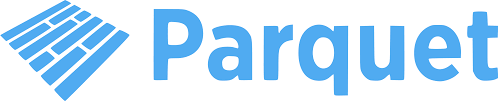

**Overview**

What is Parquet: It is an Apache project from the Hadoop ecosystem, it follows the columnar storage standard, it is a binary file and it has a great advantage which is storing the data structures (metadata).

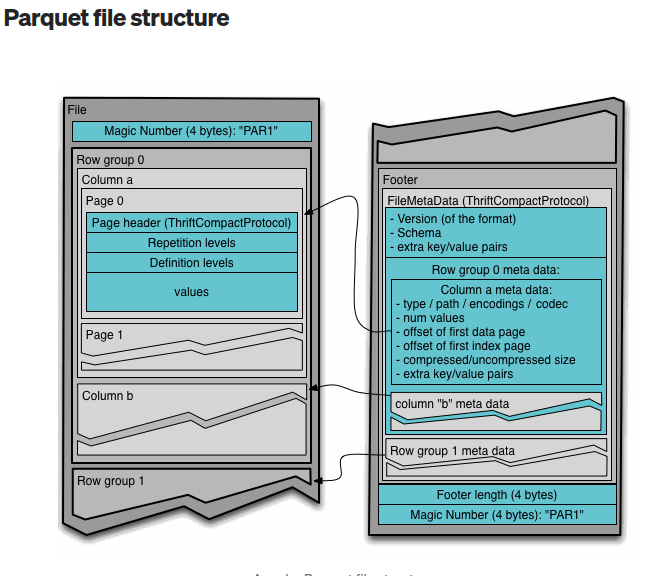

Compression methods:

**None**: No compression. This means that the data is not compressed and is stored directly in Parquet format, which can result in a larger file, but with good direct readability.

**Gzip**: Uses the Gzip compression algorithm to compress data. Gzip is efficient at compression, but may be slower to decompress as it is a lossy compression method.

**Snappy**: Another fast and lossless compression algorithm. It offers a good compression ratio with decent compression and decompression speed.

**LZO**: Provides a good compression rate with reasonable speed, but may require additional libraries to be used with Parquet.

**Brotli**: It is a similar compression algorithm to Gzip, but generally provides a better compression rate with reasonable speed.

**LZ4**: An extremely fast compression algorithm with a moderate compression ratio. It is known for its speed in both compression and decompression.

Read CSV gigante

In [3]:
df = pd.read_csv('./sample_data/replication_max_rows.csv')
c

columns datas: country_name
0    Mexico
1    Mexico
2    Mexico
Name: country_name, dtype: object

columns datas: country_name, e_regionpol


,country_name,e_regionpol
0,Mexico,Latin America
1,Mexico,Latin America
2,Mexico,Latin America


Selected datas using "loc" and "iloc"

In [ ]:
df = pd.read_csv('./sample_data/replication.csv')
columns_name: list = df.columns.tolist()
print(f'columns datas: {columns_name[0]}')
print(df.loc[0:3, columns_name[0]])

print(f'\ncolumns datas: {columns_name[0]}, {columns_name[8]}')
print(df.loc[0:3, [columns_name[0], columns_name[8]]])

print(f'\ncolumns datas: {columns_name[0]}, {columns_name[8]}')
print(df.loc[0:3, columns_name[0]:columns_name[4]])


In [ ]:
df = pd.read_csv('./sample_data/replication.csv')
columns_name: list = df.columns.tolist()
print(f'columns datas: {columns_name[0]}')
print(df.iloc[0:3, 0])

print(f'\ncolumns datas: {columns_name[0]}, {columns_name[8]}')
print(df.iloc[0:3, [0,8]])

print(f'\ncolumns datas: {columns_name[0]}, {columns_name[8]}')
print(df.iloc[0:3, 0:4])